In [ ]:
!pip install gensim
!pip install -U pip setuptools wheel
!pip install -U spacy
!spacy download en_core_web_lg
!pip install natasha

In [1]:
!pip install nltk

In [4]:
!spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
!pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import re
import gensim
import glob
import en_core_web_sm

c:\max_v\venv\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
import re
import gensim
import logging
import nltk.data 
import pandas as pd
import urllib.request
from nltk.corpus import stopwords
from gensim.models import word2vec
from nltk.tokenize import sent_tokenize, RegexpTokenizer
from tqdm.auto import tqdm
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shuva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Функции для обработки английских и испанских текстов

In [3]:
import pandas as pd
import json
from tqdm import tqdm

def parse(path):
  g = open(path, 'rb')
  for l in tqdm(g):
    yield json.loads(l)["text"]

In [4]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won['’‘`]t", "will not", phrase)
    phrase = re.sub(r"can['’‘`]t", "can not", phrase)
    phrase = re.sub(r"ain['’‘`]t", "am not", phrase)

    # general
    phrase = re.sub(r"n['’‘`]t", " not", phrase)
    phrase = re.sub(r"['’‘`]re", " are", phrase)
    phrase = re.sub(r"['’‘`]s", " is", phrase)
    phrase = re.sub(r"['’‘`]d", " would", phrase)
    phrase = re.sub(r"['’‘`]ll", " will", phrase)
    phrase = re.sub(r"['’‘`]t", " not", phrase)
    phrase = re.sub(r"['’‘`]ve", " have", phrase)
    phrase = re.sub(r"['’‘`]m", " am", phrase)

    #phrase = re.sub('([.;!?])', r' \1 ', phrase)
    phrase = re.sub(r'[^\w.?!;]', ' ', phrase)
    phrase = re.sub(' +', ' ', phrase)
    sentences = tokenizer.tokenize(phrase)

    return sentences

In [5]:
def prepare_english_text(raw_text):
    preprocessed_texts = decontracted(raw_text)
    clean_sentenses = []
    for preprocessed_text in preprocessed_texts:
        nlp_doc = nlp(preprocessed_text)
        clean_sentenses.append(" ".join([token.ent_type_ or token.lemma_.lower() for token in nlp_doc]))
    return "\n".join(clean_sentenses) + "\n"

In [6]:
def writer(texts, path):
    with open(path, "a") as text_file:
        for text in texts:
            text_file.write(text)

# Обработка английских текстов

In [7]:
import spacy
from spacy import displacy
from collections import Counter

In [11]:
from tqdm.auto import tqdm
import itertools
from multiprocessing import Pool
import multiprocessing

In [9]:
nlp = en_core_web_sm.load()

In [10]:
multiprocessing.cpu_count()

8

In [ ]:
data = parse("yelp_academic_dataset_review.json")
with Pool(8) as pool:
    chunksize = 128
    for chunk in iter(lambda: list(itertools.islice(data, chunksize)), []):
        writer(pool.imap_unordered(prepare_english_text, chunk, chunksize=5), "clean_texts.txt")

0it [00:00, ?it/s]

In [1]:
!head -10 "english/clean_texts.txt"

"head" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [ ]:
from gensim.utils import tokenize
from gensim import utils
from gensim.models import word2vec, fasttext


class MyIter:
    def __iter__(self):
        path = 'english/clean_texts.txt'
        with open(path, 'r', encoding='utf-8') as f:
            for line in tqdm(f):
                yield line.split()

model = word2vec.Word2Vec(workers=8, vector_size=300, window=10, min_count=5, max_vocab_size=25000, sg=1, negative=5)
model.build_vocab(corpus_iterable=MyIter())

In [ ]:
total_examples = model.corpus_count
model.train(corpus_iterable=MyIter(), total_examples=total_examples, epochs=3)

(29991934, 45953289)

In [ ]:
model.wv

In [ ]:
?model.train

# Обработка русских текстов


In [ ]:
!pip install mysql_connector

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pymysql
import sys
import access  # holds credentials
import mysql.connector  # connects to MySQL, is fully functional


class CreateDB(object):
    def __init__(self):
        self.cursor = None
        self.conn = pymysql.connect(host='localhost',
                             user='user',
                             password='passwd',
                             database='db',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
        
    def create_database(self):
        try:
            with self.conn.cursor() as cursor:
                for line in open('file.sql'):
                    if line.strip(): cursor.execute(line)
            self.conn.commit()

        except Warning as warn:
            f = open(access.Credentials().error_log, 'a')
            f.write('Warning: %s ' % warn + '\nStop.\n')
            sys.exit()

create = CreateDB()
create.create_database()


OperationalError: ignored

In [ ]:
!head -25 "russian/db.sql" 

-- MySQL dump 10.13  Distrib 5.6.12, for osx10.6 (x86_64)
--
-- Host: localhost    Database: neu
-- ------------------------------------------------------
-- Server version	5.6.12

/*!40101 SET @OLD_CHARACTER_SET_CLIENT=@@CHARACTER_SET_CLIENT */;
/*!40101 SET @OLD_CHARACTER_SET_RESULTS=@@CHARACTER_SET_RESULTS */;
/*!40101 SET @OLD_COLLATION_CONNECTION=@@COLLATION_CONNECTION */;
/*!40101 SET NAMES utf8 */;
/*!40103 SET @OLD_TIME_ZONE=@@TIME_ZONE */;
/*!40103 SET TIME_ZONE='+00:00' */;
/*!40014 SET @OLD_UNIQUE_CHECKS=@@UNIQUE_CHECKS, UNIQUE_CHECKS=0 */;
/*!40014 SET @OLD_FOREIGN_KEY_CHECKS=@@FOREIGN_KEY_CHECKS, FOREIGN_KEY_CHECKS=0 */;
/*!40101 SET @OLD_SQL_MODE=@@SQL_MODE, SQL_MODE='NO_AUTO_VALUE_ON_ZERO' */;
/*!40111 SET @OLD_SQL_NOTES=@@SQL_NOTES, SQL_NOTES=0 */;

--
-- Table structure for table `sentiment`
--

DROP TABLE IF EXISTS `sentiment`;
/*!40101 SET @saved_cs_client     = @@character_set_client */;
/*!40101 SET character_set_client = utf8 */;
CREATE TABLE `sentiment` (


In [ ]:
from tqdm.auto import tqdm

def parse_from_sql(path):
    g = open(path, 'r')
    for line in tqdm(g):
        if "INSERT INTO" == line[:11]:
            yield line

11

INSERT INTO `sentiment` VALUES (408906695721877504,'1386325928','Va5ilina','Пропавшая в Хабаровске школьница почти сутки провела в яме у коллектор',2,0,0,0,183,95,158,0),(408906695700520960,'1386325928','i_wont_judge_ya','ЛЕНТА, Я СЕГОДНЯ ПОЛГОДА ДИРЕКШИОНЕЕЕЕР! С:\nХОТЯ ВСЕ РАВНО НИКТО НЕ ПОЗДРАВИТ ЛОЛ',2,0,0,0,19809,804,257,11),(408906695663161344,'1386325928','victorypanasenk','Царствие Божие внутрь вас есть.',2,0,0,0,1080,986,412,0),(408906695558307840,'1386325928','35__13','RT @TwitRegion: Ученые: кофе приносит намного больше вреда, чем пиво',2,0,2,0,4712,87,91,0),(408906695549538304,'1386325927','volbeat667','http://t.co/ZzzwYLSmon справка по адаптации 5 классников',2,0,0,0,213,16,658,0),(408906695503396864,'1386325927','lera_ox','#взаимныйфоловинг',2,0,0,0,2945,242,241,0),(408906695360782336,'1386325927','nvstvp','RT @v1ka_si: Меня удивляют эти маленькие девочки которые нагло пишут и знакомятся, а потом говорят поздороваешься завтра со мной и в френд …',2,0,1,0,3540,79,39,0),(40

#Построение корпусов


In [ ]:
def make_corpus(input_path, output_file_path):
    i = 0
    file_list = glob.glob(input_path + '/*')
    with open(output_file_path, 'w') as output_file:
        for file in tqdm(file_list):
            with open(file, 'r') as input_file:
                output_file.write(input_file.read().replace('\n', ' '))
                output_file.write('\n')

In [ ]:
make_corpus('/content/new_prep_eng', 'english_corpus.txt')

In [ ]:
file_list = glob.glob('/content/drive/My Drive/ProjectSygma/texts/new_prep_eng/*')

for file in file_list:
    with open(file, 'r') as text:
        full_text = text.read()
        if full_text.find('abenefit') != -1:
            print(file)

/content/drive/My Drive/ProjectSygma/texts/new_prep_eng/Jennie_Baxter_Journalist(Fiction).txt
/content/drive/My Drive/ProjectSygma/texts/new_prep_eng/Savage(Essays).txt
/content/drive/My Drive/ProjectSygma/texts/new_prep_eng/Little_Journeys_Vol._11__Great_Businessmen(Non-Fiction).txt
/content/drive/My Drive/ProjectSygma/texts/new_prep_eng/Little_Journeys_Vol._7__Eminent_Orators(Non-Fiction).txt
/content/drive/My Drive/ProjectSygma/texts/new_prep_eng/Casey_Ryan(Fiction).txt
/content/drive/My Drive/ProjectSygma/texts/new_prep_eng/Hocken_and_Hunken(Fiction).txt
/content/drive/My Drive/ProjectSygma/texts/new_prep_eng/The_Well(Short_Stories).txt


In [ ]:
upper_file_list[654]

'/content/drive/My Drive/ProjectSygma/texts/EnLitUpper/Edgar_Allan_Poe/To_Zante(Poetry).txt'

In [ ]:
make_corpus('/content/drive/My Drive/ProjectSygma/texts/prep_rus', '/content/drive/My Drive/ProjectSygma/texts/new_russian_corpus.txt')

#Создание TF-IDF матрицы и словаря


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
'''
vec = TfidfVectorizer()
with open("english_corpus.txt", "r") as corpus:
    rus_data_transformed = vec.fit_transform(corpus)
    rus_dictionary = vec.get_feature_names()
'''

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def make_table_and_dict(corpus_path, min_df, token_pattern = None, use_idf = True):
    with open(corpus_path, 'r') as corpus_file:
        if token_pattern:
            vectorizer = TfidfVectorizer(analyzer='word', min_df=min_df, token_pattern=token_pattern, use_idf=use_idf)
        else:
            vectorizer = TfidfVectorizer(analyzer='word', min_df=min_df)
        data_vectorized = vectorizer.fit_transform(corpus_file)
    return data_vectorized, vectorizer.get_feature_names()

In [ ]:
eng_data_vectorized, eng_dictionary = make_table_and_dict('/content/drive/My Drive/ProjectSygma/texts/Marina/english_corpus.txt', 3,  '[A-Za-z]+')
#with open('/content/drive/My Drive/ProjectSygma/texts/Marina/english_dictionary.txt', 'w') as output_file:
 #   for word in eng_dictionary:
  #      output_file.write(word)
   #     output_file.write('\n')

In [ ]:
eng_data_vectorized, eng_dictionary = make_table_and_dict('/content/drive/My Drive/ProjectSygma/texts/english_corpus.txt', 3,  '[A-Za-z]+')
#with open('/content/drive/My Drive/ProjectSygma/dictionaries/new_english_dictionary.txt', 'w') as output_file:
  #  for word in eng_dictionary:
   #    output_file.write(word)
    #   output_file.write('\n')

In [ ]:
rus_data_vectorized, rus_dictionary = make_table_and_dict('/content/drive/My Drive/ProjectSygma/texts/Marina/Russian_Corpus.txt', 3,'[А-я0-9]+', True)
#with open('/content/drive/My Drive/ProjectSygma/dictionaries/new_russian_dictionary.txt', 'w') as output_file:
    #for word in rus_dictionary:
     #   output_file.write(word)
      #  output_file.write('\n')

#SVD - разложение TF-IDF матрицы

In [ ]:
from scipy.sparse.linalg import svds
import numpy as np

In [ ]:
u, sigma, vt = svds(rus_data_transformed, 3)
vt[:,1]

array([-0.00266128, -0.00143665,  0.00296122])

In [ ]:
def create_tables(data_vectorized, k_range, name):
    for k in k_range:
        u, sigma, vt = svds(data_vectorized, k)
        with open('/content/drive/My Drive/ProjectSygma/texts/Marina/' + name + str(k) + '.npy', 'wb') as f:
            np.save(f, np.dot(np.diag(sigma), vt).T)

In [ ]:
def create_table(data_vectorized, k, name):
    u, sigma, vt = svds(data_vectorized, k)
    print(sigma)
    with open('/content/drive/My Drive/ProjectSygma/texts/Marina/' + name + str(k) + '.npy', 'wb') as f:
        np.save(f, np.dot(np.diag(sigma), vt).T)

In [ ]:
create_table(eng_data_vectorized, 13, 'en_sigma_v')

[ 4.33051911  4.64866739  4.76243313  5.02412885  5.50846611  5.76991304
  6.31218465  6.43659897  7.59954981  7.98900013  9.01831903 17.42487701
 82.00224458]


In [ ]:
table = np.load('/content/drive/My Drive/ProjectSygma/texts/Marina/rus_sigma_v_log13.npy')
table[25]

array([-2.51478260e-05, -2.17755646e-05, -4.47631486e-06,  1.09674622e-04,
       -1.16120426e-04, -1.87647304e-04,  2.90750039e-04,  5.62680468e-05,
        2.66307789e-05,  2.89740989e-04,  2.21361157e-04, -4.45194672e-04,
        1.55620547e-04])

In [ ]:
create_tables(rus_data_vectorized, range(1, 13), 'rus_sigma_v_')

In [ ]:
create_tables(eng_data_vectorized, range(1, 13), 'eng_sigma_v_')

In [ ]:
a = np.load('/content/drive/My Drive/ProjectSygma/new_tables/eng_sigma_v_10.npy')
a[2]

array([-3.12980961e-05,  8.44303447e-06, -2.94796719e-06,  1.24466272e-05,
       -1.21850228e-05,  1.49143333e-05,  6.91537815e-06, -1.68855133e-05,
       -1.25252895e-05, -5.01794812e-05])

#Построение хаотического ряда по тексту

In [ ]:
from bisect import bisect_left 
import numpy as np
def binary_search(a, x): 
    i = bisect_left(a, x) 
    if i != len(a) and a[i] == x: 
        return i 
    else: 
        return -1

def text_to_series(text_path, dictionary_path, table_path):
    with open(dictionary_path, 'r') as my_dict:
        dictionary = my_dict.readlines()
    table = np.load(table_path)
    text_serie = []
    with open(text_path, 'r') as words:
      for word in words:
        word_index = binary_search(dictionary, word)
        if word_index != -1:
            word_vector = table[word_index]
            text_serie.append(word_vector)
    return text_serie

In [ ]:
import glob

file_list = glob.glob('/content/drive/My Drive/ProjectSygma/texts/new_prep_rus/*')
dictionary_path = '/content/drive/My Drive/ProjectSygma/texts/Marina/russian_dictionary.txt'
table_path = '/content/drive/My Drive/ProjectSygma/texts/Marina/rus_sigma_v_13.npy'
i = 0
for input_path in tqdm(file_list):

    time_series = text_to_series(input_path, dictionary_path, table_path)
    file_name =  input_path.split('/')[-1]
    with open('/content/drive/My Drive/ProjectSygma/texts/time_series_rus/' + file_name, 'w') as file:
        for word in time_series:
            for comp in reversed(word):
                file.write(str(comp)+' ')
            file.write('\n')

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000


In [ ]:
series = text_to_series('/content/drive/My Drive/ProjectSygma/texts/prep_rus/101.3.1.txt', '/content/drive/My Drive/ProjectSygma/dictionaries/new_russian_dictionary.txt', 
              '/content/drive/My Drive/ProjectSygma/new_tables/rus_sigma_v_6.npy')

In [ ]:
str([1,2,3])

'[1, 2, 3]'

In [ ]:
series[:20]

[array([-0.00326908, -0.00364599,  0.01185516,  0.0135483 , -0.00701752,
         0.01830079]),
 array([ 0.00367738, -0.00017877, -0.00088702,  0.00360241, -0.00087294,
         0.00250802]),
 array([-0.00302516,  0.00937522,  0.00572599,  0.01721968, -0.01719312,
         0.06849896]),
 array([ 0.00149531, -0.00271911,  0.00427228,  0.00110616, -0.00035901,
         0.00847985]),
 array([ 1.48399118, -3.45168942, -3.09588605, -0.31069327,  5.01304979,
        13.82306462]),
 array([-1.45916909e-02,  9.02203330e-01, -9.80382188e-01,  1.91592789e+00,
         2.98914287e-03,  3.28243284e+00]),
 array([-0.04185052,  0.84742791, -0.15917721,  1.69202471,  0.30071478,
         3.50494975]),
 array([ 0.0002545 , -0.00012928,  0.00037372,  0.00020291,  0.00015757,
         0.00059133]),
 array([ 0.00802554,  0.01436353, -0.02305122,  0.04679932, -0.0025886 ,
         0.1483479 ]),
 array([0.01590533, 0.08433586, 0.03532131, 0.07743938, 0.11904759,
        0.64117842]),
 array([-0.02361238,  

In [ ]:
import math

def get_split_index_m(A):
    i = len(A) - 1
    while i > 0:
        if A[i] < A[i - 1]:
            i -= 1
        else:
            break
    return i - 1


def get_change_index_m(A, i):
    j = len(A) - 1
    while j >= i:
        if A[j] > A[i]:
            break
        else:
            j -= 1
    return j


def swap_m(A, i, j):
    A[i], A[j] = (A[j], A[i])


# reverse A[start:]
def reverse_m(A, start):
    left = start
    right = len(A) - 1
    while left < right:
        swap_m(A, left, right)
        left += 1
        right -= 1


def next_permutation_m(A, v):
    i = v - 1
    while i >= 0:
        split_index = get_split_index_m(A[i])
        # the Array is sorted in descreased order
        if split_index == -1:
            reverse_m(A[i], 0)
            i -= 1
        else:
            change_index = get_change_index_m(A[i], split_index)
            swap_m(A[i], split_index, change_index)
            reverse_m(A[i], split_index + 1)
            break


def factorial_m(n):
    ans = 1
    for i in range(2, n + 1):
        ans *= i
    return ans


def permutations_m(d, v):
    a = []
    for i in range(v):
        a.append([])
        for j in range(d):
            a[-1].append(j + 1)
    perm = dict()
    perm[str(a)] = 0
    for j in range(factorial_m(d) ** v - 1):
        next_permutation_m(a, v)
        perm[str(a)] = j + 1
    return perm


def s_max_m(d, v):
    return math.log(factorial_m(d) ** v)


def s_max_list_m(d, v):
    return [1 / (factorial_m(d) ** v)] * (factorial_m(d) ** v)


def p_m(arr, d, v): 
    pr = [0] * (factorial_m(d) ** v)
    permutation_dict = permutations_m(d, v)
    for i in range(d - 1, len(arr)):
        full_curr_perm = []
        for l in range(v):
            curr = []
            for j in range(i - d + 1, i + 1):
                curr.append([arr[j][l], len(curr) + 1])
            curr.sort()
            curr_perm = []
            for k in curr:
                curr_perm.append(k[1])
            full_curr_perm.append(curr_perm)
        pr[permutation_dict[str(full_curr_perm)]] += 1
    for i in range(len(pr)):
        pr[i] /= len(arr) - d + 1
    return pr


def s_m(pr):
    entropy = 0
    for i in range(len(pr)):
        if pr[i] != 0:
            entropy -= pr[i] * math.log(pr[i])
    return entropy

def q_0_calculation_m(d, v):
    pr = [0] * (factorial_m(d) ** v)
    pr[0] = 1
    b = s_max_list_m(d, v)
    b = [pr + b for pr, b in zip(pr, b)]
    b = [i * 0.5 for i in b]
    return 1 / (s_m(b) - s_m(pr) / 2 - s_max_m(d, v) / 2)

def q_j_m(arr, d, v):
    pr = p_m(arr, d, v)
    b = s_max_list_m(d, v)
    b = [pr + b for pr, b in zip(pr, b)]
    b = [i * 0.5 for i in b]
    return q_0_calculation_m(d, v) * (s_m(b) - s_m(pr) / 2 - s_max_m(d, v) / 2)

In [ ]:
def entropy_measure_m(arr, d, v):
    return s_m(p_m(arr, d, v))/s_max_m(d, v)

def mpr_complexity_m(arr, d, v):
    return q_j_m(arr, d, v) * entropy_measure_m(arr, d, v)

In [ ]:
entropy_measure_m(series, , 6)

0.7026488242520729

In [ ]:
mpr_complexity_m(series, 3, 6)

0.5010277718519315

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math


def s_b(N, p, m, n):
    if p != 0:
        return -(n * p * math.log(p) + (N - m - n) * (1 - p * n) / (N - m - n) * math.log((1 - p * n) / (N - m - n)))
    else:
        return math.log(N - m - n)

def s_b_1(N, p, m, n):
    return -(m / N * math.log(1 / N) + n * (p + 1 / N) / 2 * math.log((p + 1 / N) / 2) + (N - m - n) * ((1 - p * n) / (N - m - n) + 1 / N) / 2 * math.log((((1 - p * n) / (N - m - n)) + 1 / N) / 2))

def entropy_measure_b(N, p, m, n):
    return s_b(N, p, m, n) / math.log(N)

def q_0_calculation_b(N, p, m, n):
    return 1 / (s_b(N, 1 / 2 / N, 0, N - 1) - math.log(N) / 2)


def q_j_b(N, p, m, n):
    return q_0_calculation_b(N, p, m, n) * (s_b_1(N, p, m, n) - s_b(N, p, m, n) / 2 - math.log(N) / 2)

def mpr_complexity_b(N, p, m, n):
    return q_j_b(N, p, m, n) * entropy_measure_b(N, p, m, n)

def borders(N, x, y):
    i = 1;
    while (i * 100 < N):
        for n in range (N - i * 100, N - 1, i):
            plt.scatter(entropy_measure_b(N, 0, 0, n), mpr_complexity_b(N, 0, 0, n), c = "red")
        i *= 2
    for n in range (0, N - 1, i):
        plt.scatter(entropy_measure_b(N, 0, 0, n), mpr_complexity_b(N, 0, 0, n), c = "red")
    
    p = 0.01
    while p < 0.99:
        p += 0.01
        plt.scatter(entropy_measure_b(N, p, 0, 1), mpr_complexity_b(N, p, 0, 1), c="green")

    plt.scatter(x, y, c="blue")
    #plt.scatter(entropy_measure_b(N, 0.01, 0, 1), mpr_complexity_b(N, 0.01, 0, 1), c = "blue")
    plt.xlabel('entropy')
    plt.ylabel('mpr_complexity')
    #ax = plt.subplots()
    plt.title('n = 9')
    plt.show()

In [ ]:
series = np.array(series)
series.shape

(264030, 6)

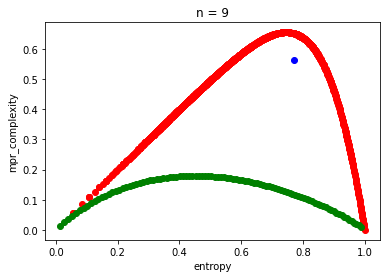

In [ ]:
borders(331776, entropy_measure_m(series[:,:4],4, 4), mpr_complexity_m(series[:,:4],4, 4))

In [ ]:
 entropy_measure_m(series[:,:4],4, 4)

0.7702056686307781

In [ ]:
mpr_complexity_m(series[:,:4],4, 4)

0.5640197724929857

In [ ]:
# -*- coding: utf-8 -*-

from __future__ import unicode_literals

import itertools
import numpy as np
from math import factorial


def _embed(x, order=3, delay=1):
    """Time-delay embedding.
    Parameters
    ----------
    x : 1d-array, shape (n_times)
        Time series
    order : int
        Embedding dimension (order)
    delay : int
        Delay.
    Returns
    -------
    embedded : ndarray, shape (n_times - (order - 1) * delay, order)
        Embedded time-series.
    """
    N = len(x)
    Y = np.empty((order, N - (order - 1) * delay))
    for i in range(order):
        Y[i] = x[i * delay:i * delay + Y.shape[1]]
    return Y.T


def util_pattern_space(time_series, lag, dim):
    """Create a set of sequences with given lag and dimension
    Args:
       time_series: Vector or string of the sample data
       lag: Lag between beginning of sequences
       dim: Dimension (number of patterns)
    Returns:
        2D array of vectors
    """
    n = len(time_series)

    if lag * dim > n:
        raise Exception('Result matrix exceeded size limit, try to change lag or dim.')
    elif lag < 1:
        raise Exception('Lag should be greater or equal to 1.')

    pattern_space = np.empty((n - lag * (dim - 1), dim))
    for i in range(n - lag * (dim - 1)):
        for j in range(dim):
            pattern_space[i][j] = time_series[i + j * lag]

    return pattern_space


def util_standardize_signal(time_series):
    return (time_series - np.mean(time_series)) / np.std(time_series)


def util_granulate_time_series(time_series, scale):
    """Extract coarse-grained time series
    Args:
        time_series: Time series
        scale: Scale factor
    Returns:
        Vector of coarse-grained time series with given scale factor
    """
    n = len(time_series)
    b = int(np.fix(n / scale))
    temp = np.reshape(time_series[0:b*scale], (b, scale))
    cts = np.mean(temp, axis = 1)
    return cts


def shannon_entropy(time_series):
    """Return the Shannon Entropy of the sample data.
    Args:
        time_series: Vector or string of the sample data
    Returns:
        The Shannon Entropy as float value
    """

    # Check if string
    if not isinstance(time_series, str):
        time_series = list(time_series)

    # Create a frequency data
    data_set = list(set(time_series))
    freq_list = []
    for entry in data_set:
        counter = 0.
        for i in time_series:
            if i == entry:
                counter += 1
        freq_list.append(float(counter) / len(time_series))

    # Shannon entropy
    ent = 0.0
    for freq in freq_list:
        ent += freq * np.log2(freq)
    ent = -ent
    return ent


def sample_entropy(time_series, sample_length, tolerance = None):
    """Calculates the sample entropy of degree m of a time_series.
    This method uses chebychev norm.
    It is quite fast for random data, but can be slower is there is
    structure in the input time series.
    Args:
        time_series: numpy array of time series
        sample_length: length of longest template vector
        tolerance: tolerance (defaults to 0.1 * std(time_series)))
    Returns:
        Array of sample entropies:
            SE[k] is ratio "#templates of length k+1" / "#templates of length k"
            where #templates of length 0" = n*(n - 1) / 2, by definition
    Note:
        The parameter 'sample_length' is equal to m + 1 in Ref[1].
    References:
        [1] http://en.wikipedia.org/wiki/Sample_Entropy
        [2] http://physionet.incor.usp.br/physiotools/sampen/
        [3] Madalena Costa, Ary Goldberger, CK Peng. Multiscale entropy analysis
            of biological signals
    """
    #The code below follows the sample length convention of Ref [1] so:
    M = sample_length - 1;

    time_series = np.array(time_series)
    if tolerance is None:
        tolerance = 0.1*np.std(time_series)

    n = len(time_series)

    #Ntemp is a vector that holds the number of matches. N[k] holds matches templates of length k
    Ntemp = np.zeros(M + 2)
    #Templates of length 0 matches by definition:
    Ntemp[0] = n*(n - 1) / 2


    for i in range(n - M - 1):
        template = time_series[i:(i+M+1)];#We have 'M+1' elements in the template
        rem_time_series = time_series[i+1:]

        searchlist = np.arange(len(rem_time_series) - M, dtype=np.int32)
        for length in range(1, len(template)+1):
            hitlist = np.abs(rem_time_series[searchlist] - template[length-1]) < tolerance
            Ntemp[length] += np.sum(hitlist)
            searchlist = searchlist[hitlist] + 1

    sampen =  - np.log(Ntemp[1:] / Ntemp[:-1])
    return sampen


def multiscale_entropy(time_series, sample_length, tolerance = None, maxscale = None):
    """Calculate the Multiscale Entropy of the given time series considering
    different time-scales of the time series.
    Args:
        time_series: Time series for analysis
        sample_length: Bandwidth or group of points
        tolerance: Tolerance (default = 0.1*std(time_series))
    Returns:
        Vector containing Multiscale Entropy
    Reference:
        [1] http://en.pudn.com/downloads149/sourcecode/math/detail646216_en.html
    """

    if tolerance is None:
        #we need to fix the tolerance at this level. If it remains 'None' it will be changed in call to sample_entropy()
        tolerance = 0.1*np.std(time_series)
    if maxscale is None:
        maxscale = len(time_series)

    mse = np.zeros(maxscale)

    for i in range(maxscale):
        temp = util_granulate_time_series(time_series, i+1)
        mse[i] = sample_entropy(temp, sample_length, tolerance)[-1]
    return mse


def permutation_entropy(time_series, order=3, delay=1, normalize=False):
    """Permutation Entropy.
    Parameters
    ----------
    time_series : list or np.array
        Time series
    order : int
        Order of permutation entropy
    delay : int
        Time delay
    normalize : bool
        If True, divide by log2(factorial(m)) to normalize the entropy
        between 0 and 1. Otherwise, return the permutation entropy in bit.
    Returns
    -------
    pe : float
        Permutation Entropy
    References
    ----------
    .. [1] Massimiliano Zanin et al. Permutation Entropy and Its Main
        Biomedical and Econophysics Applications: A Review.
        http://www.mdpi.com/1099-4300/14/8/1553/pdf
    .. [2] Christoph Bandt and Bernd Pompe. Permutation entropy — a natural
        complexity measure for time series.
        http://stubber.math-inf.uni-greifswald.de/pub/full/prep/2001/11.pdf
    Notes
    -----
    Last updated (Oct 2018) by Raphael Vallat (raphaelvallat9@gmail.com):
    - Major speed improvements
    - Use of base 2 instead of base e
    - Added normalization
    Examples
    --------
    1. Permutation entropy with order 2
        >>> x = [4, 7, 9, 10, 6, 11, 3]
        >>> # Return a value between 0 and log2(factorial(order))
        >>> print(permutation_entropy(x, order=2))
            0.918
    2. Normalized permutation entropy with order 3
        >>> x = [4, 7, 9, 10, 6, 11, 3]
        >>> # Return a value comprised between 0 and 1.
        >>> print(permutation_entropy(x, order=3, normalize=True))
            0.589
    """
    x = np.array(time_series)
    hashmult = np.power(order, np.arange(order))
    # Embed x and sort the order of permutations
    sorted_idx = _embed(x, order=order, delay=delay).argsort(kind='quicksort')
    # Associate unique integer to each permutations
    hashval = (np.multiply(sorted_idx, hashmult)).sum(1)
    # Return the counts
    _, c = np.unique(hashval, return_counts=True)
    # Use np.true_divide for Python 2 compatibility
    p = np.true_divide(c, c.sum())
    pe = -np.multiply(p, np.log2(p)).sum()
    if normalize:
        pe /= np.log2(factorial(order))
    return pe


def multiscale_permutation_entropy(time_series, m, delay, scale):
    """Calculate the Multiscale Permutation Entropy
    Args:
        time_series: Time series for analysis
        m: Order of permutation entropy
        delay: Time delay
        scale: Scale factor
    Returns:
        Vector containing Multiscale Permutation Entropy
    Reference:
        [1] Francesco Carlo Morabito et al. Multivariate Multi-Scale Permutation Entropy for
            Complexity Analysis of Alzheimer’s Disease EEG. www.mdpi.com/1099-4300/14/7/1186
        [2] http://www.mathworks.com/matlabcentral/fileexchange/37288-multiscale-permutation-entropy-mpe/content/MPerm.m
    """
    mspe = []
    for i in range(scale):
        coarse_time_series = util_granulate_time_series(time_series, i + 1)
        pe = permutation_entropy(coarse_time_series, order=m, delay=delay)
        mspe.append(pe)
    return mspe


# TODO add tests
def composite_multiscale_entropy(time_series, sample_length, scale, tolerance=None):
    """Calculate the Composite Multiscale Entropy of the given time series.
    Args:
        time_series: Time series for analysis
        sample_length: Number of sequential points of the time series
        scale: Scale factor
        tolerance: Tolerance (default = 0.1...0.2 * std(time_series))
    Returns:
        Vector containing Composite Multiscale Entropy
    Reference:
        [1] Wu, Shuen-De, et al. "Time series analysis using
            composite multiscale entropy." Entropy 15.3 (2013): 1069-1084.
    """
    cmse = np.zeros((1, scale))

    for i in range(scale):
        for j in range(i):
            tmp = util_granulate_time_series(time_series[j:], i + 1)
            cmse[i] += sample_entropy(tmp, sample_length, tolerance) / (i + 1)
    return cmse

In [ ]:
def compare_dicts(dictionary_path_1, dictionary_path_2):
    diffs = []
    with open(dictionary_path_1, 'r') as f_dict:
        with open(dictionary_path_2, 'r') as s_dict:
            f_dictionary = f_dict.read()
            s_dictionary = s_dict.read()
            for word in f_dictionary.split('\n'):
                if s_dictionary.find(word) == -1:
                    diffs.append(word)
    return diffs

a = compare_dicts('/content/drive/My Drive/ProjectSygma/texts/Marina/english_dictionary.txt', 
                  '/content/drive/My Drive/ProjectSygma/dictionaries/new_english_dictionary.txt'
              )
a[1000:]

['cajun',
 'calcilation',
 'calcining',
 'calculi',
 'calculinge',
 'caledonie',
 'calice',
 'calipee',
 'calked',
 'calkerlatin',
 'calkilated',
 'calkilatin',
 'calluna',
 'calorifere',
 'caloyer',
 'calypsos',
 'camarinam',
 'camball',
 'cambrics',
 'cambuskenneth',
 'cameliard',
 'camelotian',
 'camerera',
 'camion',
 'camouflaged',
 'campertogno',
 'camum',
 'canajian',
 'candaule',
 'candiote',
 'candore',
 'cankrie',
 'cannabina',
 'cannakin',
 'cannas',
 'canonesse',
 'canonnade',
 'canoodlin',
 'cantabrigiensi',
 'canterin',
 'cantering',
 'cantharidian',
 'cantium',
 'cantoned',
 'cantraip',
 'canvey',
 'capellae',
 'capellen',
 'caperer',
 'capiat',
 'capilli',
 'cappen',
 'cappy',
 'caprimulgus',
 'capten',
 'captif',
 'captyued',
 'carack',
 'carbondale',
 'carbonised',
 'carbuncled',
 'carcasse',
 'carcere',
 'cardinally',
 'careas',
 'careerin',
 'cariatide',
 'carimata',
 'carinthian',
 'carissimo',
 'carlina',
 'carnavalet',
 'carolingian',
 'carolled',
 'carolo',
 'ca

In [ ]:
len(a)

7304

In [ ]:
!pip install git+https://github.com/nlpub/pymystem3

  Cloning https://github.com/nlpub/pymystem3 to /tmp/pip-req-build-17asuken
  Running command git clone -q https://github.com/nlpub/pymystem3 /tmp/pip-req-build-17asuken
  Created wheel for pymystem3: filename=pymystem3-0.2.0-cp36-none-any.whl size=9921 sha256=4e7a3b39e3b78a8f49e5ae4db905b7b7811ff26388ca30549dbdc913a35933b0
  Stored in directory: /tmp/pip-ephem-wheel-cache-87smqmvc/wheels/7d/75/c2/216a594291dee680749ce12c60d16125cfe1f363059e7163dc
Successfully built pymystem3


In [ ]:
import pymystem3 
m = pymystem3.Mystem()
m.lemmatize('Бабочка взмахнула крыльями и улетела.\n Все взоры были направлены на неё.\n Взяв Марину за руку, Ваня пошёл гулять')

In [ ]:
b = compare_dicts('/content/drive/My Drive/ProjectSygma/dictionaries/english_dictionary.txt',
                  '/content/drive/My Drive/ProjectSygma/dictionaries/new_english_dictionary.txt')
b

['aaraaf',
 'aaronson',
 'abace',
 'abailard',
 'abajo',
 'abandonne',
 'abattu',
 'abazai',
 'abbondio',
 'abbotrule',
 'abducting',
 'abendessen',
 'aberfeldy',
 'abibis',
 'abiit',
 'abjectest',
 'aboad',
 'abominating',
 'abont',
 'aborder',
 'aboud',
 'abounded',
 'aboundingly',
 'aboveground',
 'aboyna',
 'abrahamus',
 'abreed',
 'abregge',
 'abreyde',
 'abrogated',
 'absentia',
 'absenting',
 'abstersive',
 'abuff',
 'abusu',
 'abutting',
 'abyla',
 'abyssmal',
 'acacias',
 'academia',
 'academicae',
 'acanthe',
 'accadian',
 'acclaiming',
 'acclimatized',
 'accorded',
 'accordent',
 'accumulated',
 'achaian',
 'achard',
 'acherontis',
 'achillis',
 'achmacalla',
 'acidulated',
 'acorse',
 'acquerir',
 'acquiesced',
 'activitie',
 'actresse',
 'actuated',
 'aculeatus',
 'acuman',
 'adalbert',
 'adamhill',
 'addlepated',
 'adelantado',
 'adeste',
 'adiantum',
 'adiise',
 'aditurae',
 'adjourning',
 'adjudged',
 'adkin',
 'admete',
 'administrador',
 'administre',
 'admonished',
 

In [ ]:
len(b)

9295

In [ ]:
!pip install pymystem3

In [ ]:
with open('/content/drive/My Drive/ProjectSygma/texts/Marina/english_corpus.txt', 'r') as en_corpus:
    full_text =  en_corpus.read()
full_text.count('PRON1') 

2500030

In [ ]:
full_text.find('john') 

136694

In [ ]:
full_text[136650:136750]

'maybe a bit from the coachman PRON1 brother john alias master murray be about eleven when PRON1 come'